# Task 2

In [15]:
import numpy as np
from grakel import GraphKernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import csr_matrix

loaded = np.load('/mnt/c/Users/danie/PyCharmProjects/ml/graphs/hard.npz', allow_pickle=True)
X_train = loaded['tr_feat']
A_train = list(loaded['tr_adj'])
y_train = loaded['tr_class']

X_test = loaded['te_feat']
A_test = list(loaded['te_adj'])
y_test = loaded['te_class']

In [16]:
from scipy.sparse import csr_matrix

def prepare_graph(adj_matrices, node_features=None):
    graphs = []
    for adj, features in zip(adj_matrices, node_features if node_features is not None else [None] * len(adj_matrices)):
        if isinstance(adj, csr_matrix):
            adj = adj.toarray()

        # Specify node's features
        if features is not None:
            node_labels = {i: tuple(features[i]) for i in range(len(features))}
        else:
            node_labels = {i: i for i in range(adj.shape[0])}
        
        graphs.append((adj, node_labels))
        
    # return graph in grakel format
    return graphs

In [17]:
grakel_train = prepare_graph(A_train, X_train)
grakel_test = prepare_graph(A_test, X_test)

In [18]:
import matplotlib.pyplot as plt

def svm_pipeline(graph_kernel):
    # Compute train and test kernels
    K_train = graph_kernel.fit_transform(grakel_train)
    K_test = graph_kernel.transform(grakel_test)

    num_labels = y_train.shape[1]
    svms = []
    y_test_pred = []

    # one SVM for one binary classification
    for i in range(num_labels):
        svm = SVC(kernel='precomputed', class_weight='balanced', random_state=42)
        svm.fit(K_train, y_train[:, i])
        svms.append(svm)
        y_test_pred.append(svm.predict(K_test))

    y_test_pred = np.array(y_test_pred).T

    # Estimate and display
    accuracies = []
    for i in range(num_labels):
        accuracy = np.mean(y_test[:, i] == y_test_pred[:, i])
        accuracies.append(accuracy)
        print(f"Label {i} Accuracy: {accuracy:.2f}")

    plt.figure(figsize=(8, 6))
    plt.bar(range(num_labels), accuracies, color='skyblue')
    plt.title("Model Accuracy per Label")
    plt.xlabel("Label")
    plt.ylabel("Accuracy")
    plt.xticks(range(num_labels), [f"Label {i}" for i in range(num_labels)])
    plt.ylim(0, 1)
    plt.show()

In [19]:
from sklearn.linear_model import Ridge

def ridge_pipeline(graph_kernel, alpha=1.0):
    # Compute kernels
    K_train = graph_kernel.fit_transform(grakel_train)
    K_test = graph_kernel.transform(grakel_test)

    num_labels = y_train.shape[1]
    ridge_models = []
    y_test_pred = []

    for i in range(num_labels):
        # Ridge regression for binary classification
        ridge = Ridge(alpha=alpha, random_state=42)
        ridge.fit(K_train, y_train[:, i])
        ridge_models.append(ridge)
        y_test_pred.append(ridge.predict(K_test))

    # Convert y to binary: split by 0.5
    y_test_pred = (np.array(y_test_pred).T > 0.5).astype(int)

    accuracies = []
    for i in range(num_labels):
        accuracy = np.mean(y_test[:, i] == y_test_pred[:, i])
        accuracies.append(accuracy)
        print(f"Label {i} Accuracy: {accuracy:.2f}")

    plt.figure(figsize=(8, 6))
    plt.bar(range(num_labels), accuracies, color='skyblue')
    plt.title("Model Accuracy per Label")
    plt.xlabel("Label")
    plt.ylabel("Accuracy")
    plt.xticks(range(num_labels), [f"Label {i}" for i in range(num_labels)])
    plt.ylim(0, 1)
    plt.show()

### For easy dataset, all scores are ~ 0.95 of accuracy

Label 0 Accuracy: 0.58
Label 1 Accuracy: 0.77
Label 2 Accuracy: 0.60


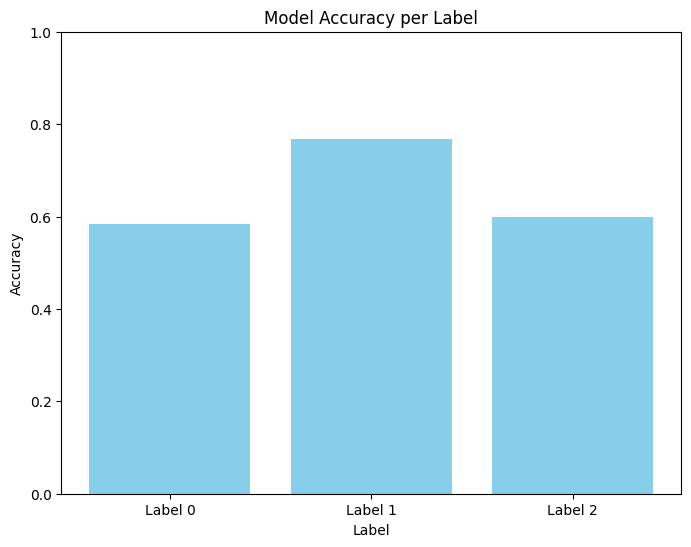

In [20]:
svm_pipeline(GraphKernel(kernel={"name": "weisfeiler_lehman", "n_iter": 5}, normalize=True))

Label 0 Accuracy: 0.68
Label 1 Accuracy: 0.71
Label 2 Accuracy: 0.60


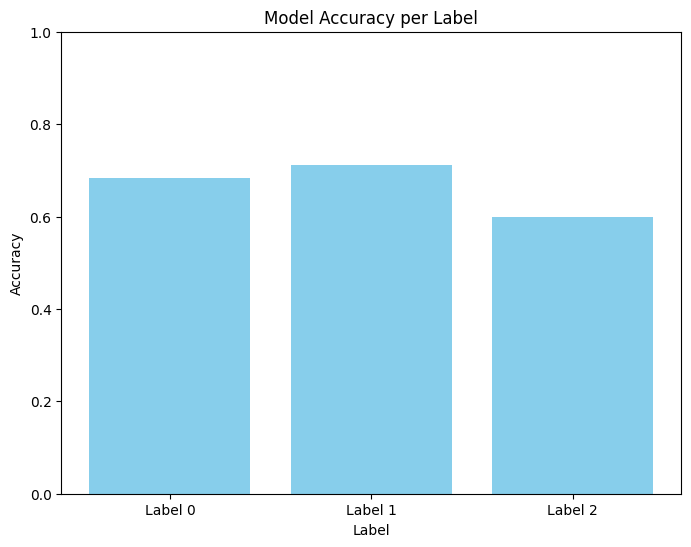

In [21]:
ridge_pipeline(GraphKernel(kernel={"name": "weisfeiler_lehman", "n_iter": 5}, normalize=True), alpha=1.0)

Label 0 Accuracy: 0.61
Label 1 Accuracy: 0.79
Label 2 Accuracy: 0.78


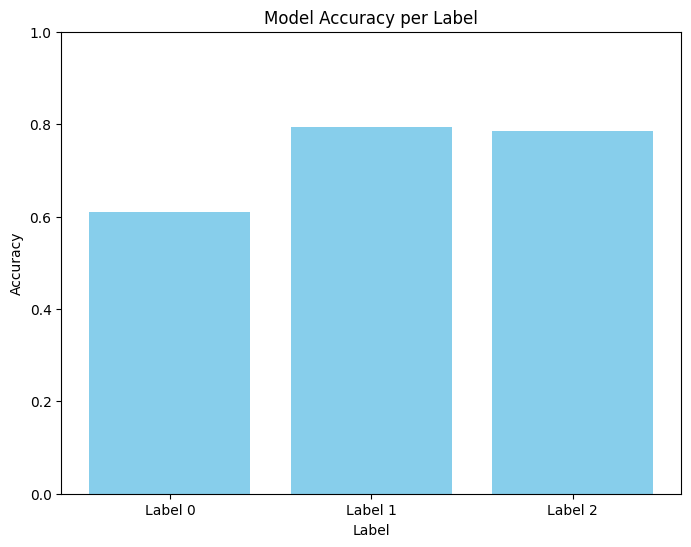

In [22]:
svm_pipeline(GraphKernel(kernel={"name": "shortest_path"}, normalize=True))

Label 0 Accuracy: 0.74
Label 1 Accuracy: 0.79
Label 2 Accuracy: 0.77


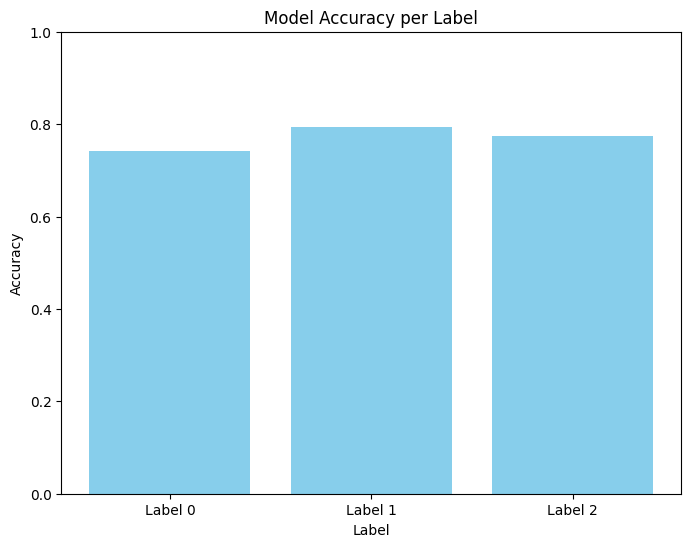

In [23]:
ridge_pipeline(GraphKernel(kernel={"name": "shortest_path"}, normalize=True), alpha=1.0)

Label 0 Accuracy: 0.69
Label 1 Accuracy: 0.29
Label 2 Accuracy: 0.45


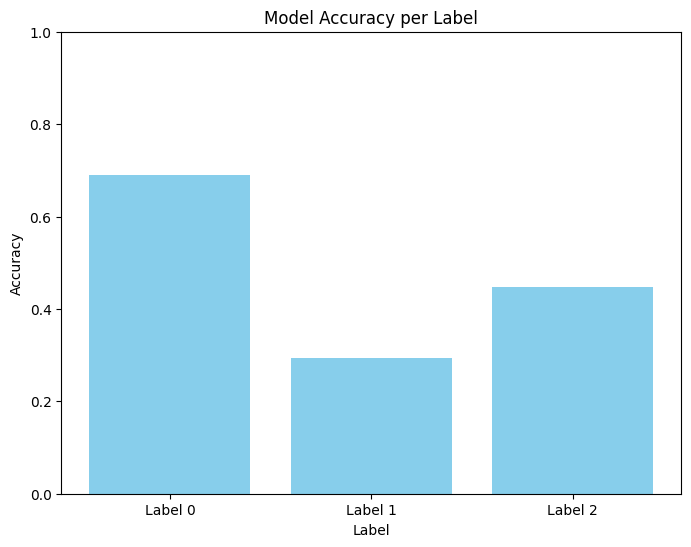

In [24]:
svm_pipeline(GraphKernel(kernel={"name": "graphlet_sampling", "k": 3, "sampling": None}, normalize=True))

Label 0 Accuracy: 0.69
Label 1 Accuracy: 0.71
Label 2 Accuracy: 0.61


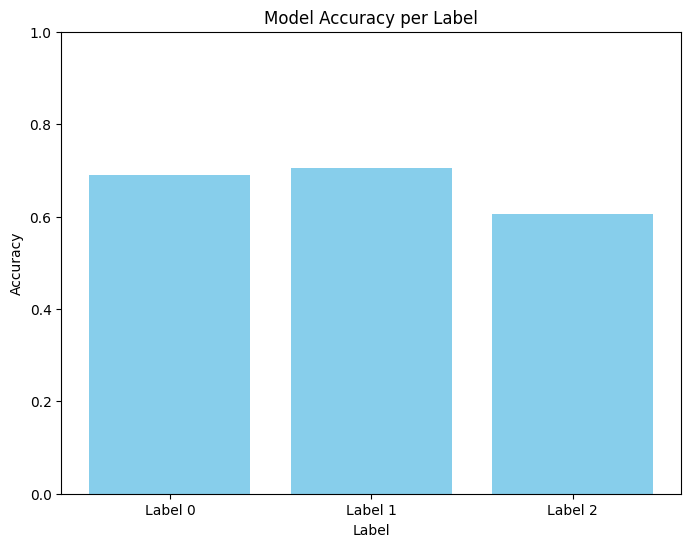

In [25]:
ridge_pipeline(GraphKernel(kernel={"name": "graphlet_sampling", "k": 3, "sampling": None}, normalize=True), alpha=1.0)